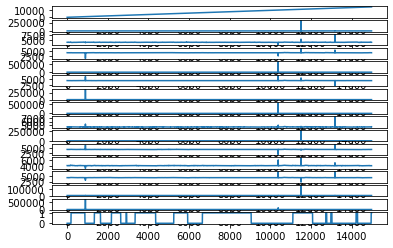

In [2]:
from pandas import read_csv
from matplotlib import pyplot
data = read_csv('D:/BrainWavesEEG/csv_result-EEG_Eye_State.csv', header=None)

values = data.values
pyplot.figure()
for i in range(values.shape[1]):
	pyplot.subplot(values.shape[1], 1, i+1)
	pyplot.plot(values[:, i])
pyplot.show()

In [4]:
from pandas import read_csv
from numpy import mean
from numpy import std
from numpy import delete
from numpy import savetxt
data = read_csv('D:/BrainWavesEEG/csv_result-EEG_Eye_State.csv', header=None)
values = data.values
for i in range(values.shape[1] - 1):
	data_mean, data_std = mean(values[:,i]), std(values[:,i])
	cut_off = data_std * 4
	lower, upper = data_mean - cut_off, data_mean + cut_off
	too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
	values = delete(values, too_small, 0)
	print('>deleted %d rows' % len(too_small))
	too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
	values = delete(values, too_large, 0)
	print('>deleted %d rows' % len(too_large))
savetxt('EEG_Eye_State_no_outliers.csv', values, delimiter=',')


>deleted 0 rows
>deleted 0 rows
>deleted 0 rows
>deleted 1 rows
>deleted 2 rows
>deleted 1 rows
>deleted 0 rows
>deleted 142 rows
>deleted 0 rows
>deleted 48 rows
>deleted 0 rows
>deleted 153 rows
>deleted 0 rows
>deleted 43 rows
>deleted 0 rows
>deleted 0 rows
>deleted 0 rows
>deleted 15 rows
>deleted 0 rows
>deleted 5 rows
>deleted 10 rows
>deleted 0 rows
>deleted 21 rows
>deleted 53 rows
>deleted 0 rows
>deleted 12 rows
>deleted 58 rows
>deleted 53 rows
>deleted 0 rows
>deleted 59 rows


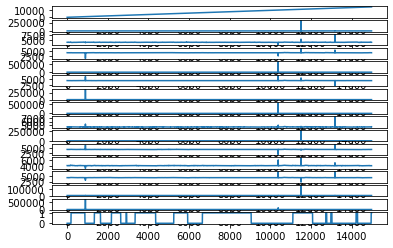

In [5]:
from pandas import read_csv
from matplotlib import pyplot
data = read_csv('D:/BrainWavesEEG/csv_result-EEG_Eye_State.csv', header=None)
values = data.values
pyplot.figure()
for i in range(values.shape[1]):
	pyplot.subplot(values.shape[1], 1, i+1)
	pyplot.plot(values[:, i])
pyplot.show()

In [6]:
# knn for predicting eye state
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
data = read_csv('D:/BrainWavesEEG/csv_result-EEG_Eye_State.csv', header=None)
values = data.values
scores = list()
kfold = KFold(10, shuffle=True, random_state=1)
for train_ix, test_ix in kfold.split(values):
	trainX, trainy = values[train_ix, :-1], values[train_ix, -1]
	testX, testy = values[test_ix, :-1], values[test_ix, -1]
	model = KNeighborsClassifier(n_neighbors=3)
	model.fit(trainX, trainy)
	yhat = model.predict(testX)
	score = accuracy_score(testy, yhat)
	scores.append(score)
	print('>%.3f' % score)
print('Final Score: %.3f' % (mean(scores)))

>0.998
>0.995
>0.996
>0.995
>0.997
>0.997
>0.996
>0.996
>0.997
>0.998
Final Score: 0.997


In [2]:
# knn for predicting eye state
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from numpy import array
data = read_csv('D:/BrainWavesEEG/csv_result-EEG_Eye_State.csv', header=None)
values = data.values
X, y = values[:, :-1], values[:, -1]
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=1)
historyX, historyy = [x for x in trainX], [x for x in trainy]
predictions = list()
for i in range(len(testy)):
	model = KNeighborsClassifier(n_neighbors=3)
	tmpX, tmpy = array(historyX)[-10:,:], array(historyy)[-10:]
	model.fit(tmpX, tmpy)
	yhat = model.predict([testX[i, :]])[0]
	predictions.append(yhat)
	historyX.append(testX[i, :])
	historyy.append(testy[i])
    
    
    
score = accuracy_score(testy, predictions)
print(score)

0.992656875834446
